# Исследование рынка недвижимости

## Общая информация о данных

In [1]:
import pandas as pd

try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


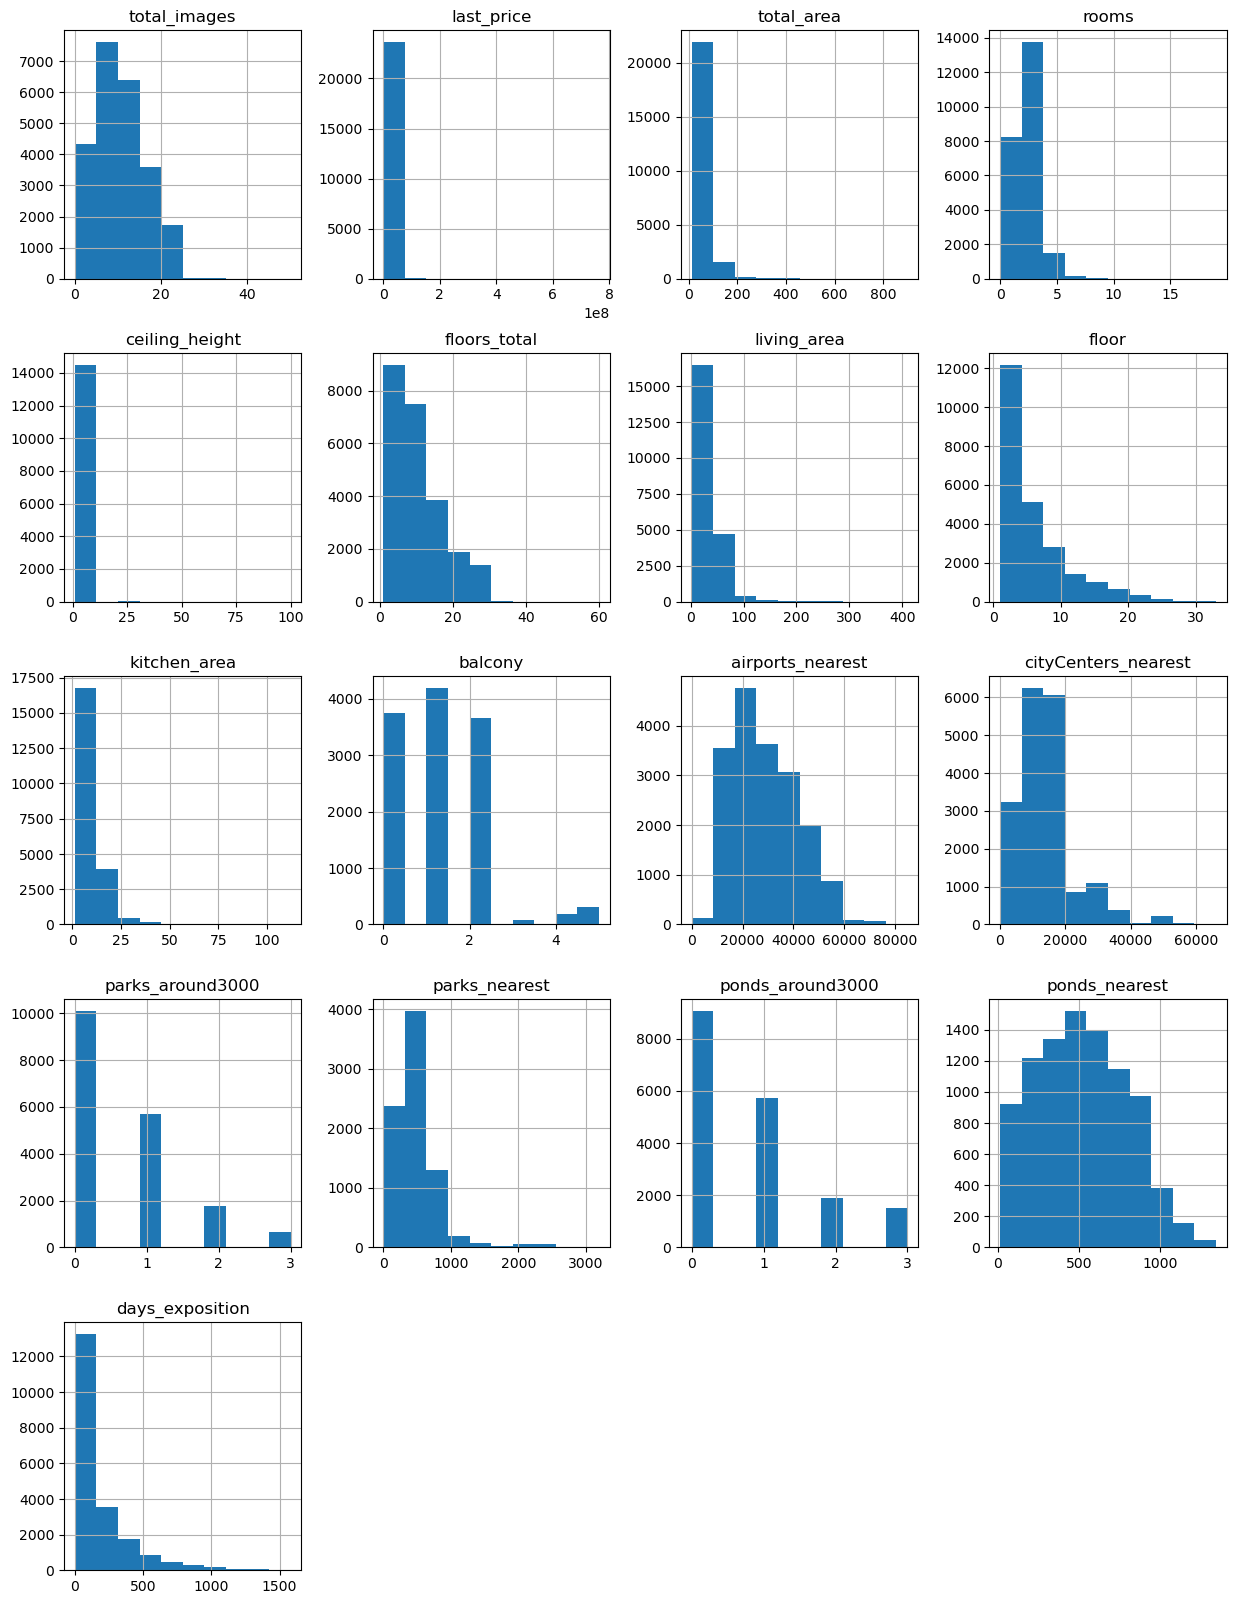

In [4]:
data.hist(figsize=(15, 20));

В таблице 23699 строк, 22 столбца. В датасете есть данные о квартире, о доме, в котором расположена квартира, и о самом объявлении. В 14 столбцах есть пропущенные значения. Нужно будет обработать пропущенные значения, проверить есть ли аномальные значения, возможно изменить тип некоторых данных и найти взаимосвязи. 
Первый взгляд на гистрограммы не дает много информации, будем смотреть параметры подробнее.  

### 1. Устранение пропусков

In [5]:
data.isna().sum().sort_values(ascending=False) # количество пропущенных значений для каждого столбца

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Пропуски есть в 14 столбцах: ceiling height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, Parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

Больше всего пропусков в столбце is_apartment, значения в этом столбце булевые, заменим их на логичное значение. В столбцах parks_nearest и ponds_nearest пропущенных значений около 65% от общего количества, удалять строки с пропущенными значениями не будем, заменим на другое значение или оставим пропуск. Около 3000 пропусков (12%) в столбце days_exposition, тут пропуски логичны. В столбце floors_total всего 86 пропусков, информация не самая важная, но удалять строки все равно не будем, скорее всего оставим как есть. В столбце locality_name 49 пропусков, это один из самых важных параметров, без названия населенного пункта не определить привлекательность квартиры и вообще насколько она подходит абстрактному покупателю, возможно придется удалить эти строки, пропусков всего 0.2% от общего количества строк, это незначительно количество, на исследование не повлияет. В столбцах, где пропусков больше 2000 (10%), удалять полностью строки небезопасно и неправильно, так как в других столбцах может быть ценная информация, удаление такого количества строк может существенно исказить результаты исследования.

Если продавец не указал, апартаменты или нет, то, скорее всего, это не апартаменты. Такие пропуски заменим на False.

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(False) # заполняем пропуски в столбце 'is_apartment'

Eсли продавец не указал число балконов, то, скорее всего, в квартире их нет. Такие пропуски правильно заменить на 0.

In [7]:
data['balcony'] = data['balcony'].fillna(0) # заполняем пропуски в столбце 'balcony'

Если нет информации о парках и водоемах в радиусе 3 км, то скорее всего, их нет. Пропуски заменим на 0.

In [8]:
data['parks_around3000'] = data['parks_around3000'].fillna(0) # заполняем пропуски в столбце 'parks_around3000' 

In [9]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) # заполняем пропуски в столбце 'ponds_around3000' 

Пропуски в столбцах 'airports_nearest', 'floors_total', 'cityCenters_nearest', 'ponds_nearest', parks_nearest', 'ceiling_height'  не будем заполнять, так как это незначительные параметры, сильное влияние на привлекательность и цену квартиры не имеют, удалять строки с пропусками в этих столбцах также не будем, так как строк с пропущенными значений в этих столбцах больше 10% от общего количества, удаление строк приведет к потере важных данных и искажению результатов исследования. 

Рассчитаем жилую площадь и площадь кухни исходя из среднего отношения обоих параметров к общей площади. 

In [10]:
data.query('total_area < living_area + kitchen_area') # сначала поищем квартиры, там где общая площадь меньше, чем сумма площади
# кухни и жилой площади, их всего 64 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,False,...,6.20,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,False,...,5.00,0.0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,False,...,9.28,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,False,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,False,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000.0,44.00,2019-02-12T00:00:00,2,27.00,2.0,38.00,2,False,...,8.60,2.0,городской поселок Большая Ижора,NaN,NaN,0.0,NaN,0.0,NaN,NaN
21868,12,2600000.0,34.30,2018-09-26T00:00:00,1,2.50,9.0,30.60,6,False,...,8.00,2.0,Сосновый Бор,NaN,NaN,0.0,NaN,0.0,NaN,107.0
21915,14,11990000.0,91.40,2016-05-16T00:00:00,2,NaN,16.0,62.00,12,False,...,32.40,0.0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21956,0,5200000.0,46.00,2018-07-20T00:00:00,2,NaN,5.0,44.00,5,False,...,8.00,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


In [11]:
data['kitchen/ total'] = data['kitchen_area'] / data['total_area'] # добавим новый столбец, рассчитаем отношение площади кухни 
# к общей площади

In [12]:
data['living/ total'] = data['living_area'] / data['total_area'] # добавим новый столбец, рассчитаем отношение жилой площади 
# к общей площади

In [13]:
kitchen_total_median = data['kitchen/ total'].median() # рассчитаем медиану по столбцу
kitchen_total_median

0.1724137931034483

In [14]:
living_total_median = data['living/ total'].median() # рассчитаем медиану по столбцу
living_total_median

0.5678598992678503

In [15]:
import numpy as np
data['living_area'] = np.where((data['total_area'] > data['living_area'] + data['kitchen_area']) & 
         (data['living_area'].isna()), living_total_median * data['total_area'], data['living_area'])
# там где общая площадь больше суммы площади кухни и жилой площади, заменим пропуски в столбце жилая плоащдь на произведение
# общей площади и медиану по столбцу living/ total

In [16]:
data['kitchen_area'] = np.where((data['total_area'] > data['living_area'] + data['kitchen_area']) & 
         (data['kitchen_area'].isna()), kitchen_total_median * data['total_area'], data['kitchen_area'])
# сделаем то же самое, только для столбца kitchen_area

In [17]:
data['living/ total'] = np.where((data['total_area'] < data['living_area'] + data['kitchen_area']),
                                 living_total_median, data['living/ total'])
# cкорректируем значение в столбце living/ total, там где общая площадь меньше суммы площади кухни и жилой площади

In [18]:
data['kitchen/ total'] = np.where((data['total_area'] < data['living_area'] + data['kitchen_area']),
                                 kitchen_total_median, data['kitchen/ total'])
# сделаем то же самое для столбца kitchen/ total

In [19]:
data['living_area'] = np.where((data['total_area'] < data['living_area'] + data['kitchen_area']), 
                               living_total_median * data['total_area'], data['living_area'])
# заменим значение в столбце living_area, там где общая площадь меньше суммы плоащди кухни и жилой площади

In [20]:
data['kitchen_area'] = np.where((data['total_area'] < data['living_area'] + data['kitchen_area']),
                                kitchen_total_median * data['total_area'], data['kitchen_area'])
# сделаем то же самое для столбца kitchen_area

In [21]:
data.query('total_area < living_area + kitchen_area') # не осталось строк, где общая площадь меньше суммы площади кухни и 
# жилой площади

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen/ total,living/ total


Сделали замену в столбцах kitchen_area и living_area, там где общая площадь больше суммы площади кухни и жилой площади. 
Предположим, что в строках, где общая площадь меньше суммы площади кухни и жилой площади, была ошибка при вводе, так как в общую площадь входят не только площадь кузни и жилая площадь, а еще санузлы, кладовки и тд. В этих строках мы сделали замены, использовав медиану по соотношению площади кухни и жилой площади к общей площади. 

In [22]:
data = data.dropna(subset = ['locality_name'])

Удалим строки с пропусками в столбце с наименованием населенного пункта, так как это важный параметр в рамках анализа
рынка недвижимости. Квартиры в разных населенных пунктах имеют разные параметры, например цены могут сильно отличаться.
Если оставим строки с пропусками, не сможем сделать убедительных выводов по этой выборке, так как не знаем, в каком городе расположена квартира. 
Так как пропусков всего 49, удаление не повлияет на ход исследования.

Пропуски в данных могли быть, если продавец не обладал информацией по определенному параметру или не посчитал какой-то параметр незначительным, или для некоторых квартир не хватало картографических данных. 
Пропуски в столбце 'days_exposition' означает, что объявление еще не снято с публикации. 

### 2. Изменение типа данных 

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [24]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [25]:
data[['parks_around3000', 'ponds_around3000', 'balcony']] = data[['parks_around3000', 'ponds_around3000', 
                                                                  'balcony']].astype(int)

In [26]:
data[['last_price', 'total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'airports_nearest', 
     'cityCenters_nearest', 'ponds_nearest', 'parks_nearest', 'days_exposition', 'floors_total', 'kitchen/ total', 
     'living/ total']] = data[['last_price', 'total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'airports_nearest', 
                               'cityCenters_nearest', 'ponds_nearest', 'parks_nearest', 'days_exposition', 'floors_total',
                               'kitchen/ total', 'living/ total']].astype('float32')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float32       
 2   total_area            23650 non-null  float32       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float32       
 6   floors_total          23565 non-null  float32       
 7   living_area           21752 non-null  float32       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float32       
 13  balcony         

Менять тип данных нужно для проведения арифметических операций над значениями, проведения корректного расчета разных показателей, а также для экономии памяти.

### 3. Изменение наименований населенных пунктов

In [28]:
data['locality_name'].unique() # выведем уникальные значения населенных пунктов

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [29]:
len(data['locality_name'].unique()) # посчитаем количество уникальных значений 

364

In [30]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') # заменим все ё на е

In [31]:
def location_type(column): # создадим функцию, чтобы вытащить из столбца locality_name вид населенного пункта 
    if 'Санкт' in column: 
        return 'город'
    elif any (x in column for x in ['городск', 'коттед', 'котедж']): 
        return 'ПГТ'
    elif 'посел' in column: 
        return 'поселок'
    elif 'село' in column: 
        return 'село'
    elif 'товарищ' in column:
        return 'товарищество'
    elif 'деревня' in column: 
        return 'деревня'
    else: 
        return 'неизвестно'
            

In [32]:
data['location_type'] = data['locality_name'].apply(location_type) # применим функцию к столбцу locality_name 

In [33]:
data['location_type'].value_counts() 

город           15721
неизвестно       4287
поселок          2107
деревня           945
ПГТ               553
село               32
товарищество        5
Name: location_type, dtype: int64

In [34]:
def only_name(column):  # cоздадим функцию, чтобы вытащить наименование населенного пункта из столбца locality_name
    only_name_column = column.str.replace("|".join(["поселок", "товарищество", "село", "городского", "садовое",
                                                    "коттеджный", "котедж", "деревня", "городской", "типа", 
                                                    "садоводческое", "некоммерческое"]), "", regex=True).str.strip()
    return only_name_column

In [35]:
data.insert(loc=16, column='only_name', value=only_name(data['locality_name'])) # добавим новый столбец в таблицу

In [36]:
names = data[['locality_name', 'location_type','only_name']] # проверим как сработали обе функции 
names.head(10) 

,locality_name,location_type,only_name
0,Санкт-Петербург,город,Санкт-Петербург
1,поселок Шушары,поселок,Шушары
2,Санкт-Петербург,город,Санкт-Петербург
3,Санкт-Петербург,город,Санкт-Петербург
4,Санкт-Петербург,город,Санкт-Петербург
5,городской поселок Янино-1,ПГТ,Янино-1
6,поселок Парголово,поселок,Парголово
7,Санкт-Петербург,город,Санкт-Петербург
8,поселок Мурино,поселок,Мурино
9,Санкт-Петербург,город,Санкт-Петербург


In [37]:
len(data['only_name'].unique()) # после удаления дубликатов, видим, что число уникальных значений уменьшилось 

308

### 4. Обработка аномальных значений

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float32       
 2   total_area            23650 non-null  float32       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float32       
 6   floors_total          23565 non-null  float32       
 7   living_area           21752 non-null  float32       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float32       
 13  balcony         

In [39]:
data['ceiling_height'].sort_values().unique() # посмотрим на уникальные значения в столбце ceiling_height

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Text(0.5, 1.0, 'Высота потолков')

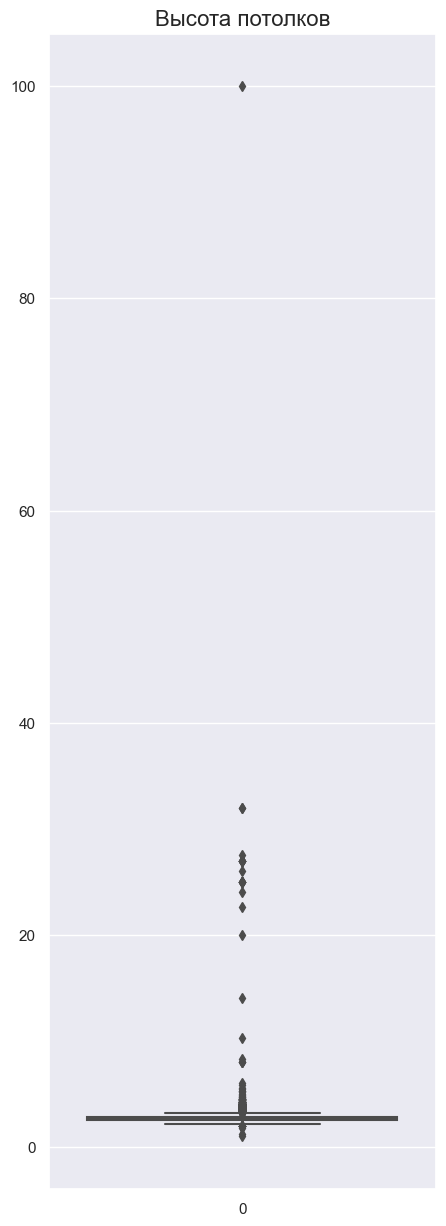

In [40]:
import seaborn as sns
sns.set(rc={"figure.figsize":(5, 15)})
boxplot_height = sns.boxplot(data=data['ceiling_height'])
boxplot_height.axes.set_title("Высота потолков", fontsize=16)

# посмотрим на распределение данных в столбце с высотой потолков

In [41]:
data['ceiling_height'].describe()

count    14490.000000
mean         2.771298
std          1.261583
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Видим, что медиана не больше 2.7, третий квартиль находится на уровне 2.8, но на графике видны выбросы около 15 метров, 
есть несколько значений больше 20, и одно значение в 100 метров. Выбросов не так много, их либо удалим, либо преобразуем,
большая часть значений расположена в диапазоне от 2.1 до 3.22 метров.  

In [42]:
data.query('ceiling_height > 5') # квартир с высотой потолка больше 5 метров всего 36, это около 0.1% от общего количества

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,only_name,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen/ total,living/ total,location_type
355,17,3600000.0,55.200001,2018-07-12,2,25.0,5.0,32.000000,2,False,...,Гатчина,NaN,0,NaN,0,NaN,259.0,NaN,0.579710,неизвестно
464,15,66571000.0,280.299988,2015-06-11,6,5.2,8.0,159.500000,7,False,...,Санкт-Петербург,6655.0,3,187.0,1,616.0,578.0,0.075276,0.569033,город
1026,20,155000000.0,310.000000,2018-10-12,5,5.3,3.0,190.000000,3,False,...,Санкт-Петербург,4785.0,0,NaN,1,603.0,NaN,0.203226,0.612903,город
1388,20,59800000.0,399.000000,2015-01-21,5,5.6,6.0,NaN,6,False,...,Санкт-Петербург,6934.0,2,149.0,2,577.0,719.0,NaN,NaN,город
3148,14,2900000.0,75.000000,2018-11-12,3,32.0,3.0,53.000000,2,False,...,Волхов,NaN,0,NaN,0,NaN,NaN,0.106667,0.706667,неизвестно
3474,3,1400000.0,30.000000,2018-03-16,1,8.0,5.0,15.300000,2,False,...,Нурма,NaN,0,NaN,0,NaN,125.0,0.243333,0.510000,деревня
4643,0,4300000.0,45.000000,2018-02-01,2,25.0,9.0,30.000000,2,False,...,Санкт-Петербург,13256.0,1,658.0,1,331.0,181.0,0.155556,0.666667,город
4876,7,3000000.0,25.000000,2017-09-27,0,27.0,25.0,17.000000,17,False,...,Мурино,NaN,0,NaN,0,NaN,28.0,NaN,0.680000,поселок
5076,0,3850000.0,30.500000,2018-10-03,1,24.0,5.0,19.500000,1,True,...,Санкт-Петербург,8389.0,3,397.0,1,578.0,7.0,0.180328,0.639344,город
5246,0,2500000.0,54.000000,2017-10-13,2,27.0,5.0,30.000000,3,False,...,Мины,NaN,0,NaN,0,NaN,540.0,0.166667,0.555556,деревня


In [43]:
data.query('ceiling_height <2') # посчитаем количество квартир, где высота потолка меньше 2 м

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,only_name,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen/ total,living/ total,location_type
5712,5,1500000.0,42.799999,2017-08-14,2,1.20,2.0,27.500000,1,False,...,Мга,NaN,0,NaN,0,NaN,248.0,0.121495,0.642523,ПГТ
16934,5,4100000.0,40.000000,2017-10-17,1,1.75,37.0,17.400000,5,False,...,Санкт-Петербург,20444.0,0,NaN,3,80.0,71.0,0.208500,0.435000,город
22590,16,6000000.0,55.000000,2018-10-31,2,1.00,12.0,32.400002,7,False,...,Санкт-Петербург,14217.0,2,293.0,2,289.0,13.0,0.181818,0.589091,город


Квартиры с высотой более 5 метров удалять не будем, предположим, что при заполнении параметра ceiling height была ошибка ввода, и там где высота потолка выше 20 м, на самом деле 2 м, и дальше по аналогии. 

In [44]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>=20 else x) # разделим значения на 10, там где высота
# выше 20 м 

In [45]:
median_ceiling_height = data['ceiling_height'].median() # рассчитаем медиану в столбце ceiling_height

In [46]:
#list_1 = {1.:median_ceiling_height, 1.2:median_ceiling_height, 1.75:median_ceiling_height}
#data['ceiling_height']= data['ceiling_height'].map(list_1).fillna(data['ceiling_height'])

data = data.replace({'ceiling_height':{1.:median_ceiling_height, 1.75:median_ceiling_height}})
# заменим аномально низкие значения на медиану 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>✔️ С делением на 10 согласна.
</div>

In [47]:
data['ceiling_height'].sort_values().unique()# проверим сработали ли манипуляции

array([ 1.20000005,  2.        ,  2.20000005,  2.25      ,  2.26000004,
        2.29999995,  2.33999991,  2.4       ,  2.4000001 ,  2.45000005,
        2.46000004,  2.47000003,  2.48000002,  2.49000001,  2.5       ,
        2.50999999,  2.51999998,  2.52999997,  2.53999996,  2.54999995,
        2.55999994,  2.56999993,  2.57999992,  2.58999991,  2.5999999 ,
        2.6       ,  2.6099999 ,  2.61999989,  2.63000011,  2.6400001 ,
        2.6500001 ,  2.66000009,  2.67000008,  2.68000007,  2.69000006,
        2.7       ,  2.70000005,  2.71000004,  2.72000003,  2.73000002,
        2.74000001,  2.75      ,  2.75999999,  2.76999998,  2.77999997,
        2.78999996,  2.79999995,  2.80999994,  2.81999993,  2.82999992,
        2.83999991,  2.8499999 ,  2.8599999 ,  2.86999989,  2.88000011,
        2.8900001 ,  2.9000001 ,  2.91000009,  2.92000008,  2.93000007,
        2.94000006,  2.95000005,  2.96000004,  2.97000003,  2.98000002,
        2.99000001,  3.        ,  3.00999999,  3.01999998,  3.02

In [48]:
data['rooms'].sort_values().unique() # посмотрим на уникальные значения в столбце rooms

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19],
      dtype=int64)

Text(0.5, 1.0, 'Количество комнат')

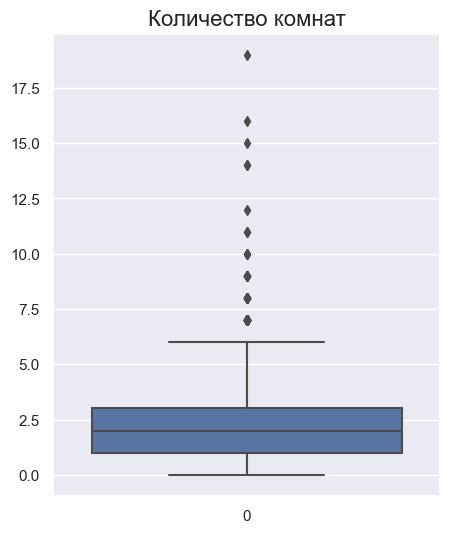

In [49]:
sns.set(rc={"figure.figsize":(5, 6)})
boxplot_height = sns.boxplot(data=data['rooms'])
boxplot_height.axes.set_title("Количество комнат", fontsize=16)

# посмотрим на распределение данных в столбце с количеством комнат

Данные разбросаны от 0 до ~ 6, медиана около 2.5, количество комнат больше 6 - выбросы. 

In [50]:
data.query('rooms > 6') # количество строк, там где кол-во комнат больше 6 - всего 90 (~0.3%). Удалять эти строки не будем,
# потому что действительно бывают квартиры с большим количеством комнат, пусть и редко. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,only_name,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen/ total,living/ total,location_type
581,20,65000000.0,365.000000,2019-03-18,7,2.90,7.0,NaN,7,False,...,Санкт-Петербург,1690.0,3,378.0,3,58.0,NaN,NaN,NaN,город
648,3,17500000.0,183.699997,2018-07-01,11,3.40,7.0,138.800003,7,False,...,Санкт-Петербург,3148.0,0,NaN,0,NaN,NaN,0.072401,0.755580,город
660,3,49950000.0,483.899994,2017-10-04,7,3.20,6.0,312.500000,4,False,...,Санкт-Петербург,945.0,3,461.0,3,22.0,391.0,0.054557,0.645795,город
681,20,24900000.0,249.000000,2015-08-13,7,NaN,5.0,180.000000,4,False,...,Санкт-Петербург,6108.0,0,NaN,0,NaN,781.0,NaN,0.722892,город
750,9,29500000.0,188.800003,2017-03-04,7,2.70,2.0,119.300003,1,False,...,Санкт-Петербург,814.0,0,NaN,2,267.0,246.0,0.054025,0.631886,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22264,20,22000000.0,141.000000,2019-01-24,7,NaN,5.0,84.000000,2,False,...,Санкт-Петербург,3334.0,2,447.0,1,468.0,90.0,0.177305,0.595745,город
22420,12,25000000.0,196.000000,2016-11-04,7,3.50,6.0,145.000000,5,False,...,Санкт-Петербург,3658.0,1,552.0,0,NaN,NaN,0.086735,0.739796,город
22649,18,22900000.0,206.000000,2016-04-04,7,NaN,6.0,142.000000,2,False,...,Санкт-Петербург,5544.0,0,NaN,1,251.0,75.0,0.078641,0.689320,город
23400,17,30000000.0,213.000000,2017-09-28,7,3.40,5.0,151.399994,5,False,...,Санкт-Петербург,1225.0,2,342.0,3,30.0,299.0,0.144601,0.710798,город


In [51]:
data['rooms'] = data['rooms'].replace(0,1) # в квартире не может не быть комнат, там где 0 - заменим на 1 

In [52]:
data['rooms'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19],
      dtype=int64)

In [53]:
data['floors_total'].sort_values().unique() # посмотрим на уникальные значения в столбце floors_total,
# 52 этаж и 60 этажей выглядит как аномалии

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan],
      dtype=float32)

Text(0.5, 1.0, 'Всего этажей в доме')

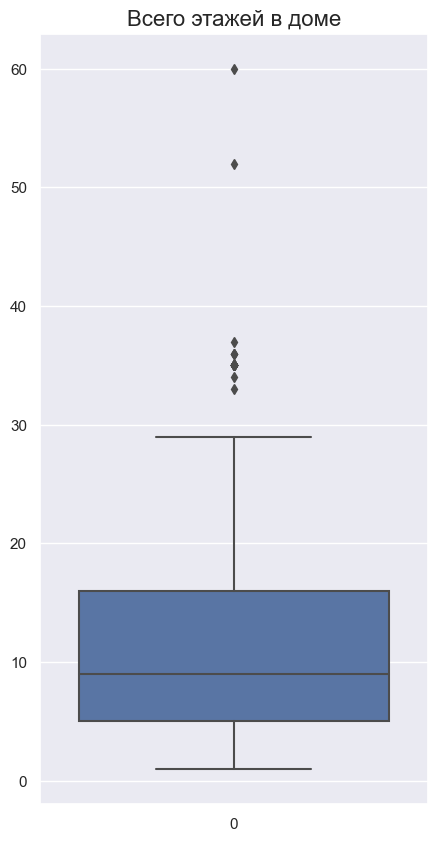

In [54]:
sns.set(rc={"figure.figsize":(5, 10)})
boxplot_height = sns.boxplot(data=data['floors_total'])
boxplot_height.axes.set_title("Всего этажей в доме", fontsize=16)

# посмотрим на распределение данных в столбце с количеством этажей в доме

Как и на предыдущих графиках, верхняя граница уса не совпадает с максимальным значением, присутствуют выбросы. 
Данных находятся в диапазоне от 1 до около 30, всё, что больше 30 - выбросы. 

In [55]:
data.query('floors_total > 30') # таких строк всего 32, почти все они в Санкт-Петербурге, можно предположить, что такие высотки 
# могли быть построены в этом городе. В самом высоком жилом доме в Санкт-Петербурге - 37 этажей, поэтому строки с этим 
# количеством и меньше оставим, а вот 52 этажа и 60 этажей похожи на ошибки, заменим значения в этих строках на медиану. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,only_name,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen/ total,living/ total,location_type
397,15,5990000.0,54.000000,2018-03-22,2,NaN,36.0,21.400000,28,False,...,Санкт-Петербург,20444.0,0,NaN,3,80.0,11.0,0.346296,0.396296,город
871,14,7777777.0,75.000000,2017-11-16,2,NaN,35.0,40.500000,23,False,...,Санкт-Петербург,20444.0,0,NaN,3,80.0,169.0,0.156000,0.540000,город
1060,10,5200000.0,50.000000,2015-11-06,2,NaN,35.0,28.392996,15,False,...,Санкт-Петербург,20444.0,0,NaN,3,80.0,281.0,0.172414,0.567860,город
1697,11,3550000.0,28.000000,2018-02-08,1,2.65,34.0,18.000000,23,False,...,Санкт-Петербург,20444.0,0,NaN,3,80.0,410.0,NaN,0.642857,город
1917,13,10150000.0,74.000000,2017-11-17,2,2.80,35.0,34.400002,30,False,...,Санкт-Петербург,20444.0,0,NaN,3,80.0,NaN,0.175676,0.464865,город
2253,12,3800000.0,45.500000,2018-06-28,2,2.88,60.0,27.400000,4,False,...,Кронштадт,49488.0,2,342.0,3,614.0,166.0,0.162637,0.602198,неизвестно
2966,9,4300000.0,37.000000,2017-08-08,1,NaN,35.0,14.000000,15,False,...,Санкт-Петербург,20444.0,0,NaN,3,80.0,50.0,0.281081,0.378378,город
4855,12,5500000.0,50.000000,2017-06-22,1,2.80,35.0,22.000000,4,False,...,Санкт-Петербург,20339.0,1,609.0,3,145.0,537.0,0.260000,0.440000,город
5749,20,3590000.0,25.000000,2017-08-30,1,2.80,35.0,NaN,26,False,...,Санкт-Петербург,20444.0,0,NaN,3,80.0,198.0,NaN,NaN,город
5807,17,8150000.0,80.000000,2019-01-09,2,2.70,36.0,41.000000,13,False,...,Санкт-Петербург,20444.0,0,NaN,3,80.0,38.0,0.150000,0.512500,город


In [56]:
median_floors_total = data['floors_total'].median() # рассчитаем медиану по количеству этажей 
median_floors_total

9.0

In [57]:
data = data.replace({'floors_total':{52:median_floors_total, 60:median_floors_total}}) # заменим аномальные значения на медиану 

In [58]:
data['last_price_mln'] = data['last_price'] / 1000000 # добавим новый столбец, где цена указана в миллионах 

Text(0.5, 1.0, 'Цена в млн руб')

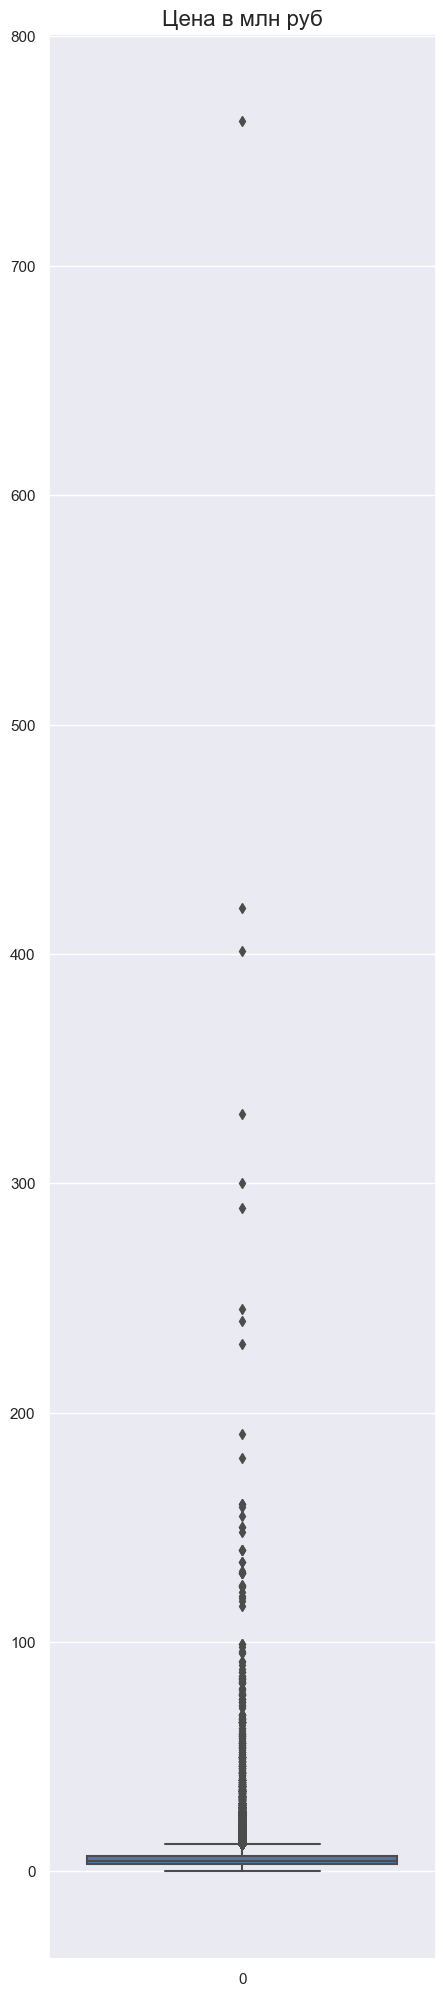

In [59]:
sns.set(rc={"figure.figsize":(5, 25)})
boxplot_height = sns.boxplot(data=data['last_price_mln'])
boxplot_height.axes.set_title("Цена в млн руб", fontsize=16)

# посмотрим на распределение данных в столбце с ценой в миллионах

In [60]:
data['last_price_mln'].describe()

count    23650.000000
mean         6.541127
std         10.896399
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price_mln, dtype: float64

На графике видим, что присутствует большое количество выбросов, самый большой выброс - около 760 мн руб, хотя третий квартиль
на уровне 6.8 млн рублей. Медиана - 4.65 млн рублей. Межквартильный размах - 3.4 млн руб. Верхняя граница уса равна примерно 
11.9 млн рублей. Значения больше 12 млн - выбросы. 

In [61]:
data.query('last_price_mln > 12') # квартир с ценой больше 12 млн руб - 1936 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen/ total,living/ total,location_type,last_price_mln
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,...,16028.0,1,482.0,2,755.0,NaN,0.231481,0.472222,город,13.000000
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2,84.0,3,234.0,424.0,NaN,NaN,город,64.900000
19,16,14200000.0,121.000000,2019-01-09,3,2.75,16.0,76.000000,8,False,...,12843.0,0,NaN,0,NaN,97.0,0.099174,0.628099,город,14.200000
35,6,15500000.0,149.000000,2017-06-26,5,NaN,5.0,104.000000,4,False,...,3502.0,0,NaN,1,779.0,644.0,0.114094,0.697987,город,15.500000
42,13,22000000.0,161.800003,2015-07-08,4,2.80,4.0,80.900002,2,False,...,30605.0,2,47.0,1,907.0,987.0,0.108776,0.500000,неизвестно,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23587,7,12100000.0,88.000000,2017-07-07,3,NaN,10.0,NaN,5,False,...,8370.0,1,392.0,2,359.0,200.0,0.159091,NaN,город,12.100000
23590,0,21187872.0,123.300003,2017-04-25,3,NaN,NaN,50.400002,18,False,...,4529.0,0,NaN,0,NaN,104.0,0.191403,0.408759,город,21.187872
23608,22,14000000.0,80.000000,2017-11-10,3,NaN,11.0,44.099998,6,False,...,11710.0,1,518.0,1,232.0,19.0,0.137500,0.551250,город,14.000000
23631,17,14799000.0,104.000000,2018-11-18,3,3.10,4.0,66.000000,2,False,...,13944.0,0,NaN,1,553.0,90.0,0.134615,0.634615,город,14.799000


In [62]:
data.query('last_price_mln > 12 and only_name == "Санкт-Петербург"') # предсказуемо большинство из них в Санкт-Петербурге, 1869

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen/ total,living/ total,location_type,last_price_mln
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,...,16028.0,1,482.0,2,755.0,NaN,0.231481,0.472222,город,13.000000
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2,84.0,3,234.0,424.0,NaN,NaN,город,64.900000
19,16,14200000.0,121.000000,2019-01-09,3,2.75,16.0,76.000000,8,False,...,12843.0,0,NaN,0,NaN,97.0,0.099174,0.628099,город,14.200000
35,6,15500000.0,149.000000,2017-06-26,5,NaN,5.0,104.000000,4,False,...,3502.0,0,NaN,1,779.0,644.0,0.114094,0.697987,город,15.500000
51,7,45000000.0,161.000000,2017-10-17,3,3.20,8.0,38.000000,4,False,...,6589.0,0,NaN,3,99.0,541.0,0.310559,0.236025,город,45.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23587,7,12100000.0,88.000000,2017-07-07,3,NaN,10.0,NaN,5,False,...,8370.0,1,392.0,2,359.0,200.0,0.159091,NaN,город,12.100000
23590,0,21187872.0,123.300003,2017-04-25,3,NaN,NaN,50.400002,18,False,...,4529.0,0,NaN,0,NaN,104.0,0.191403,0.408759,город,21.187872
23608,22,14000000.0,80.000000,2017-11-10,3,NaN,11.0,44.099998,6,False,...,11710.0,1,518.0,1,232.0,19.0,0.137500,0.551250,город,14.000000
23631,17,14799000.0,104.000000,2018-11-18,3,3.10,4.0,66.000000,2,False,...,13944.0,0,NaN,1,553.0,90.0,0.134615,0.634615,город,14.799000


Выбросов по цене почти 2000 штук, это около 9% от общего количества. Удаление такого количества может серьезно повлиять на 
результаты исследования, модифицировать их как-то тоже не можем. Объем элитного дорогого жилья в Санкт-Петербурге невелик, несмотря на это совсем игнорировать его не можем. 

In [63]:
data.query('last_price_mln > 150') # на графике видим, что квартир с ценой больше 150 млн немного, всего 15. Цена в 150 млн и
# выше, более чем в 12 раз превосходит верхнюю границу уса. Так как таких квартир немного, можем себе позволить удалить эти 
# строки, ввиду того, что они сильно оттягивают на себя статистики. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen/ total,living/ total,location_type,last_price_mln
1026,20,155000000.0,310.000000,2018-10-12,5,5.30,3.0,190.000000,3,False,...,4785.0,0,NaN,1,603.0,NaN,0.203226,0.612903,город,155.0000
1436,19,330000000.0,190.000000,2018-04-04,3,3.50,7.0,95.000000,5,False,...,1197.0,3,519.0,3,285.0,233.0,0.210526,0.500000,город,330.0000
2536,16,159984000.0,242.399994,2015-08-27,4,3.85,9.0,131.000000,7,False,...,2242.0,1,679.0,1,227.0,501.0,0.082508,0.540429,город,159.9840
5893,3,230000000.0,500.000000,2017-05-31,6,NaN,7.0,NaN,7,False,...,5297.0,0,NaN,2,198.0,50.0,0.080000,NaN,город,230.0000
8900,13,190870000.0,268.000000,2016-03-25,3,NaN,8.0,132.000000,7,False,...,5297.0,0,NaN,2,198.0,901.0,0.149254,0.492537,город,190.8700
12971,19,763000000.0,400.000000,2017-09-30,7,NaN,10.0,250.000000,10,False,...,3956.0,1,530.0,3,756.0,33.0,NaN,0.625000,город,763.0000
13749,7,240000000.0,410.000000,2017-04-01,6,3.40,7.0,218.000000,7,False,...,5297.0,0,NaN,2,198.0,199.0,0.097561,0.531707,город,240.0000
14706,15,401300000.0,401.000000,2016-02-20,5,NaN,9.0,204.000000,9,False,...,2389.0,1,545.0,1,478.0,393.0,0.059850,0.508728,город,401.3000
15651,20,300000000.0,618.000000,2017-12-18,7,3.40,7.0,258.000000,5,False,...,5297.0,0,NaN,2,198.0,111.0,0.113269,0.417476,город,300.0000
16461,17,245000000.0,285.700012,2017-04-10,6,3.35,7.0,182.800003,4,False,...,6235.0,3,400.0,3,140.0,249.0,0.104305,0.639832,город,245.0000


In [64]:
data.query('last_price_mln < 0.5') # посмотрим, есть ли квартиры, которые стоят меньше 500 тыс рублей

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen/ total,living/ total,location_type,last_price_mln
5698,7,450000.0,42.000000,2017-07-31,2,NaN,1.0,23.000000,1,False,...,NaN,0,NaN,0,NaN,233.0,0.138095,0.547619,ПГТ,0.45000
6859,6,490000.0,40.000000,2017-12-11,1,NaN,5.0,NaN,3,False,...,NaN,0,NaN,0,NaN,43.0,NaN,NaN,деревня,0.49000
8793,7,12190.0,109.000000,2019-03-20,2,2.75,25.0,32.000000,25,False,...,9176.0,1,805.0,0,NaN,8.0,0.371560,0.293578,город,0.01219
9581,7,450000.0,43.400002,2018-08-31,2,NaN,5.0,30.299999,3,False,...,NaN,0,NaN,0,NaN,96.0,0.126728,0.698157,деревня,0.45000
10782,3,490000.0,29.100000,2016-05-05,1,2.50,5.0,17.000000,5,False,...,NaN,0,NaN,0,NaN,719.0,0.189003,0.584192,неизвестно,0.49000
14911,5,430000.0,54.000000,2018-06-26,2,NaN,3.0,NaN,3,False,...,NaN,0,NaN,0,NaN,44.0,NaN,NaN,поселок,0.43000
16032,8,480000.0,32.000000,2019-01-06,1,NaN,2.0,16.000000,1,False,...,NaN,0,NaN,0,NaN,83.0,NaN,0.500000,неизвестно,0.48000
16219,14,450000.0,38.500000,2018-07-11,2,2.65,2.0,NaN,1,False,...,NaN,0,NaN,0,NaN,45.0,NaN,NaN,деревня,0.45000
16274,18,440000.0,40.000000,2018-07-10,1,NaN,5.0,NaN,1,False,...,NaN,0,NaN,0,NaN,45.0,NaN,NaN,деревня,0.44000
17456,7,430000.0,30.400000,2019-04-22,1,NaN,2.0,16.000000,1,False,...,NaN,0,NaN,0,NaN,NaN,0.197368,0.526316,неизвестно,0.43000


Одна квартира площадью 109 кв метров с ценой 12.19 тыс руб похожа на ошибку, удалим эту строку. 

In [65]:
data = data.loc[data['last_price_mln'] > 0.4] # удаляем строки с аномальными значениями

In [66]:
data = data.loc[data['last_price_mln'] < 150]

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23632 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23632 non-null  int64         
 1   last_price            23632 non-null  float32       
 2   total_area            23632 non-null  float32       
 3   first_day_exposition  23632 non-null  datetime64[ns]
 4   rooms                 23632 non-null  int64         
 5   ceiling_height        14479 non-null  float64       
 6   floors_total          23547 non-null  float32       
 7   living_area           21736 non-null  float32       
 8   floor                 23632 non-null  int64         
 9   is_apartment          23632 non-null  bool          
 10  studio                23632 non-null  bool          
 11  open_plan             23632 non-null  bool          
 12  kitchen_area          21366 non-null  float32       
 13  balcony         

Изначально было 23650 строк, после удаления аномальных значений - 23632, удалено всего 18 строк, это более чем допустимое значение.

## Добавление новых столбцов в таблицу

In [68]:
data['price_per_sqm'] = round(data['last_price'] / data['total_area']) # добавим столбец - цена одного квадратного метра

In [69]:
data['weekday_first'] = pd.DatetimeIndex(data['first_day_exposition']).weekday # добавим столбец - день недели публикации
# объявления : 0 — понедельник, 1 — вторник и так далее

In [70]:
data['month_first'] = pd.DatetimeIndex(data['first_day_exposition']).month # добавим столбец - месяц публикации объявления

In [71]:
data['year_first'] = pd.DatetimeIndex(data['first_day_exposition']).year # добавим столбец - год публикации объявления

In [72]:
import numpy as np # добавим новый столбец с типом этажа квартиры
data['floor_name'] = np.where(data['floor'] == 1, 'первый', 'другой')
data['floor_name'] = np.where(data['floor'] == data['floors_total'], 'последний', data['floor_name'])

In [73]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000) # добавим столбец - расстояние до центра города 
# в километрах 

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23632 entries, 0 to 23698
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23632 non-null  int64         
 1   last_price              23632 non-null  float32       
 2   total_area              23632 non-null  float32       
 3   first_day_exposition    23632 non-null  datetime64[ns]
 4   rooms                   23632 non-null  int64         
 5   ceiling_height          14479 non-null  float64       
 6   floors_total            23547 non-null  float32       
 7   living_area             21736 non-null  float32       
 8   floor                   23632 non-null  int64         
 9   is_apartment            23632 non-null  bool          
 10  studio                  23632 non-null  bool          
 11  open_plan               23632 non-null  bool          
 12  kitchen_area            21366 non-null  float3

## Исследовательский анализ данных

### 1. Построение графиков по основным параметрам квартир

#### 1.1 Общая площадь

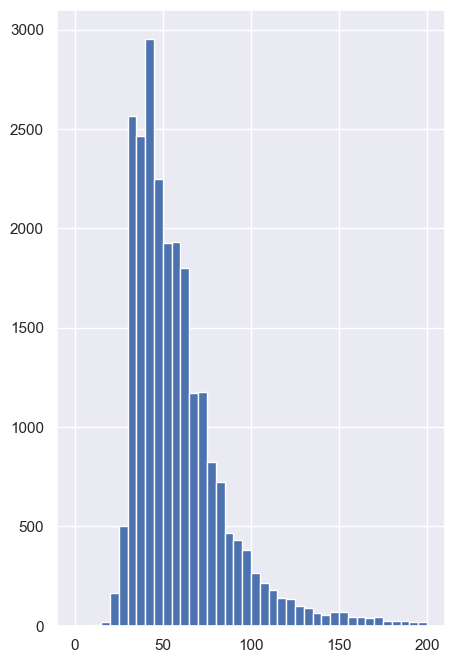

In [75]:
data['total_area'].hist(bins=40, range=(0, 200), figsize=(5,8));

Гистограмма скошена вправо, на это возможно влияют выбросы в значениях, которые сильно отличаются от средних значениях. 
Большинство значений расположены в диапазоне 40 - 55 кв метров. Максимальное значение для графика - 200, так как после 200 количество квартир с такой площадью еле заметны на графике. 

In [76]:
data['total_area'].describe()

count    23632.000000
mean        60.104282
std         34.366447
min         12.000000
25%         40.000000
50%         52.000000
75%         69.599998
max        631.200012
Name: total_area, dtype: float64

#### 1.2. Жилая площадь

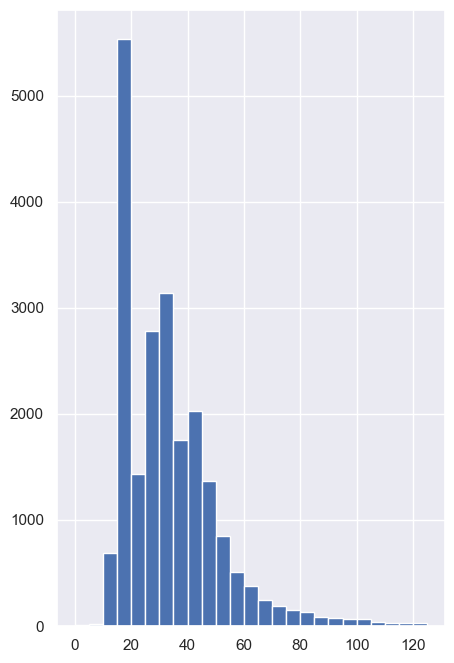

In [77]:
data['living_area'].hist(bins=25, range=(0, 125), figsize=(5,8));

Гистограмма скошена вправо, максимальное значение примерно 400, но количество значений после 125 сильно меньше, поэтому для графика поставим максимум 125. Есть два явных пика - 20 и 30. Если игнорировать пик около 20, то значения распределены нормально вокруг 30.

In [78]:
data['living_area'].describe()

count    21736.000000
mean        34.298817
std         21.521818
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200001
max        409.000000
Name: living_area, dtype: float64

#### 1.3. Площадь кухни

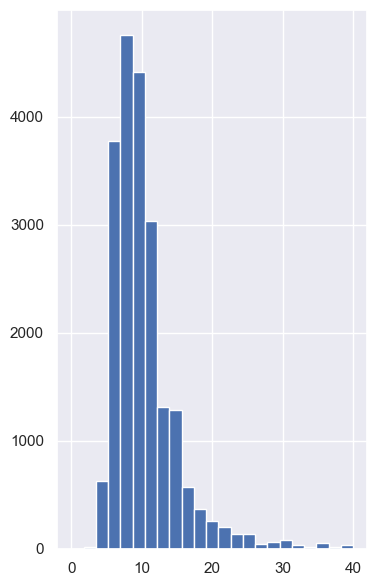

In [79]:
data['kitchen_area'].hist(bins=23, range=(0,40), figsize=(4,7));

Данные распределены нормально с центром около 8, примерно 20% всех квартир имеют площадь кухни - 8 кв метров. График скошен вправо из-за аномально больших значений, максимум для графика - 40, так как после 40 сильно меньше значений. 

In [80]:
data['kitchen_area'].describe()

count    21366.000000
mean        10.533585
std          5.796013
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

#### 1.4. Цена объекта

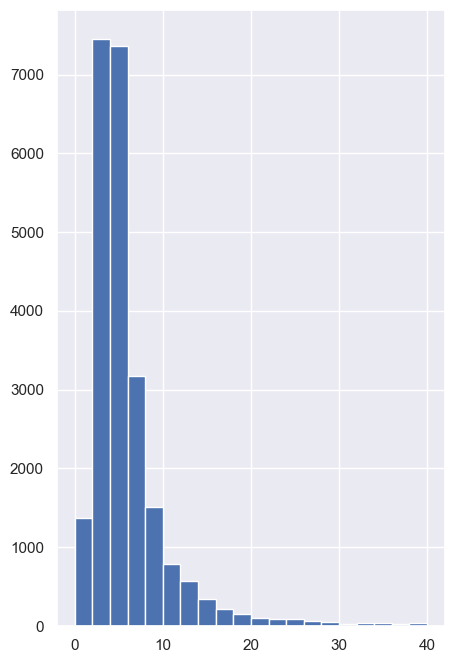

In [81]:
data['last_price_mln'].hist(bins=20, range=(0,40), figsize=(5,8));

Цены на квартиры в целом расположены в диапазоне от 1 млн руб до 40 млн руб, с пиком в 5 млн руб. Есть выбросы с очень высокой ценой, поэтому график скошен вправо. 

In [82]:
data['last_price_mln'].describe()

count    23632.000000
mean         6.354699
std          7.355278
min          0.430000
25%          3.400000
50%          4.642000
75%          6.773321
max        148.000000
Name: last_price_mln, dtype: float64

#### 1.5. Количество комнат 

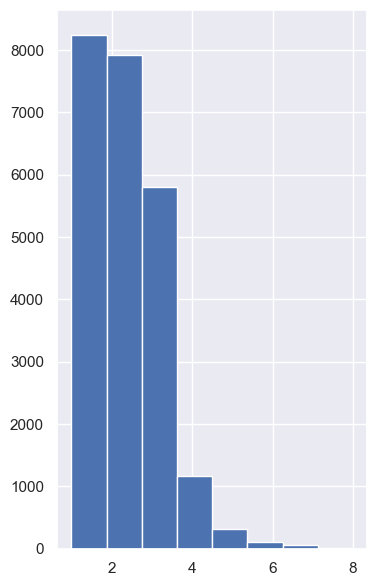

In [83]:
data['rooms'].hist(range=(1,8), figsize=(4,7), bins=8);

В большинстве квартир от 1 до 3 комнат, присутствуют также квартиры с 4 и 5 квартирами, а также выбросы вплоть до 19 комнат. 

In [84]:
data['rooms'].describe()

count    23632.000000
mean         2.075914
std          1.060799
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

#### 1.6. Высота потолка

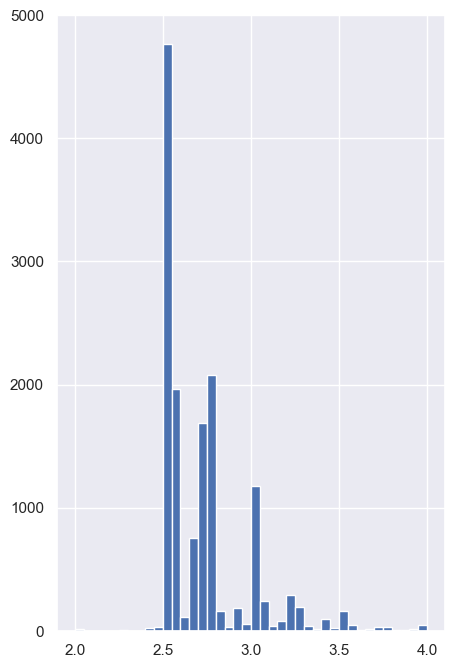

In [85]:
data['ceiling_height'].hist(range=(2,4), bins=40, figsize=(5,8));

Высота потолков разбросана от 2 метров до 4 метров, явный пик - 2.5 метров. Также присутствуют выбросы. 

In [86]:
data['ceiling_height'].describe()

count    14479.000000
mean         2.728924
std          0.318114
min          1.200000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

#### 1.7. Этаж

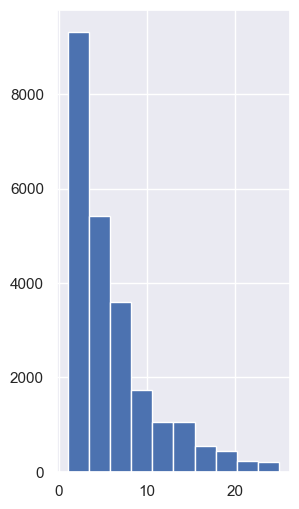

In [87]:
data['floor'].hist(range=(1,25), bins=10, figsize=(3,6));

График скошен вправо, большинство квартир расположены до 5 этажа. Также значительное количество находятся в диапазоне от 5 до 10 этажей. Есть выбросы вплоть до 30.

In [88]:
data['floor'].describe()

count    23632.000000
mean         5.891588
std          4.881726
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

#### 1.8. Категория этажа

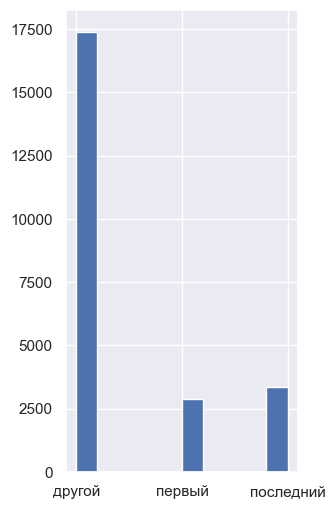

In [89]:
data['floor_name'].hist(figsize=(3,6));

Примерно одинаковое количество (~2600 квартир) расположены на первом или последнем этаже. Остальные 17.5 тыс квартир расположены ни на первом, ни на последнем этаже.

#### 1.9. Общее количество этажей

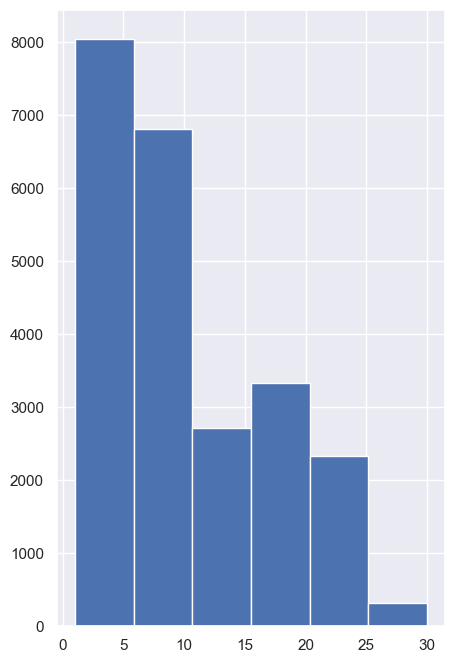

In [90]:
data['floors_total'].hist(range=(1,30), bins=6, figsize=(5,8));

Значения разбросаны от 1 до 30, около 8 тыс квартир расположены в домах с этажностью до 5, чуть меньше квартир - в домах с этажностью до 10. Треть квартир расположена в домах с этажностью до 25. Также есть выбросы.

In [91]:
data['floors_total'].describe()

count    23547.000000
mean        10.673206
std          6.581944
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

#### 1.10. Расстояние до центра

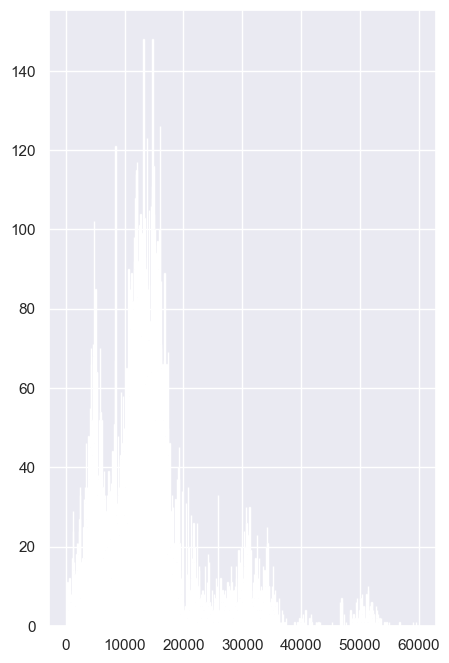

In [92]:
data['cityCenters_nearest'].hist(range=(100, 60000), bins=1000, figsize=(5,8));

Расстояние до центра города (м) - в диапазоне от 100 м до 55 000 м. Есть пик в 15 000 м. 

In [93]:
data['cityCenters_nearest'].describe()

count    18121.000000
mean     14207.709961
std       8605.060547
min        181.000000
25%       9267.000000
50%      13109.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

#### 1.11. Расстояние до аэропорта

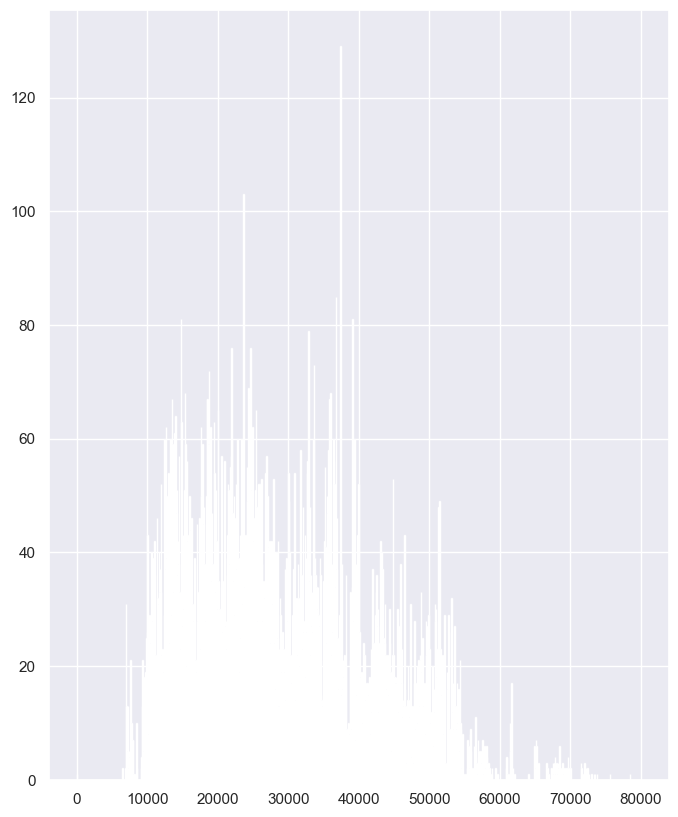

In [94]:
data['airports_nearest'].hist(range=(0, 80000), bins=(1000), figsize=(8,10));

Можно выделить три центра - 15 000 м, 25 000 м, 35 000 м. В целом значения разбросаны от 10 000 м до 75 000 м. 

In [95]:
data['airports_nearest'].describe()

count    18098.000000
mean     28804.462891
std      12642.569336
min          0.000000
25%      18573.000000
50%      26757.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

#### 1.12. Расстояние до парка

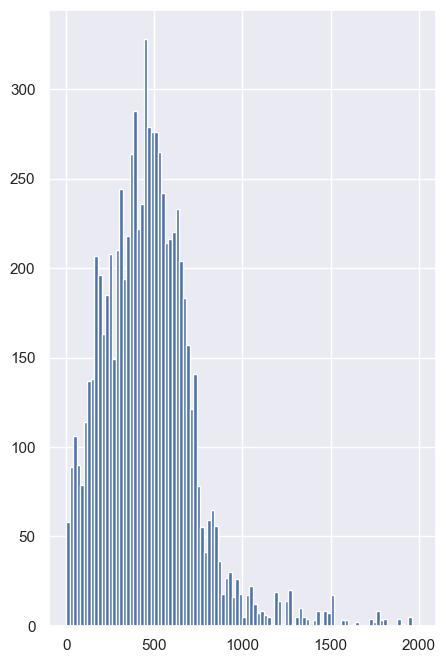

In [96]:
data['parks_nearest'].hist(range=(0,2000), bins=100, figsize=(5,8));

Данные распределены нормально, в диапазоне от 0 до 1500 м, график скошен вправо. Пик приходится на 500 м. 

In [97]:
data['parks_nearest'].describe()

count    8052.000000
mean      490.922760
std       342.710358
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

#### 1.13. День публикации объявления

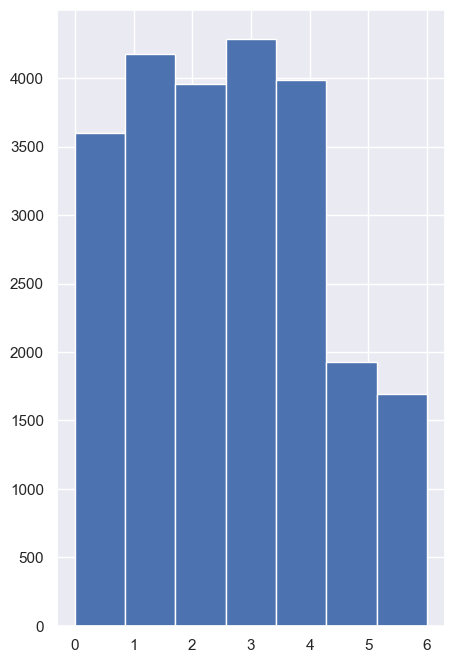

In [98]:
data['weekday_first'].hist(bins=7, figsize=(5,8));

Большинство объявлений размещаются по будням (равномерно с понедельника по пятницу), на выходных сильно меньше.

In [99]:
data['weekday_first'].describe()

count    23632.000000
mean         2.568890
std          1.788909
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_first, dtype: float64

#### 1.14. Месяц публикации объявления

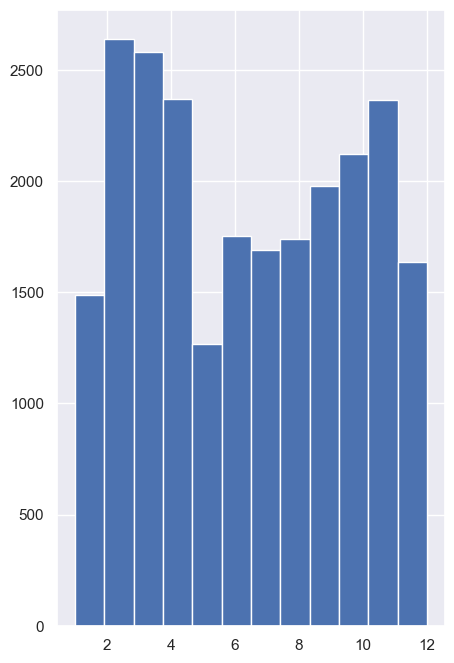

In [100]:
data['month_first'].hist(bins=12, figsize=(5,8));

Большинство объявлений опубликованы в феврале-марте и октябре-ноябре, меньше всего объявлений размещено в январе, мае и декабре. 

In [101]:
data['month_first'].describe()

count    23632.000000
mean         6.401955
std          3.491193
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_first, dtype: float64

### 2. Анализ скорости продажи квартир

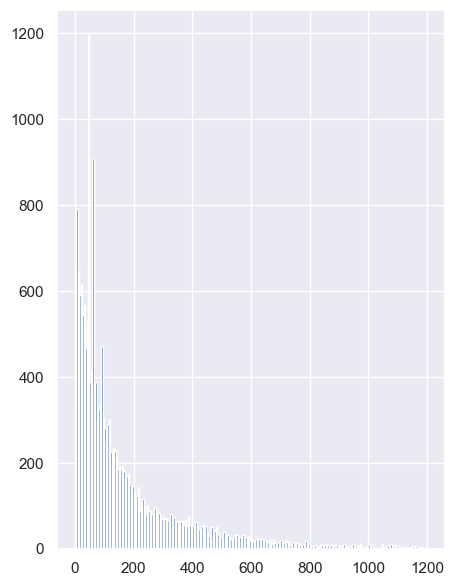

In [102]:
data['days_exposition'].hist(range=(0,1200), bins=240, figsize=(5,7));

In [103]:
data['days_exposition'].describe()

count    20454.000000
mean       180.686707
std        219.729736
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

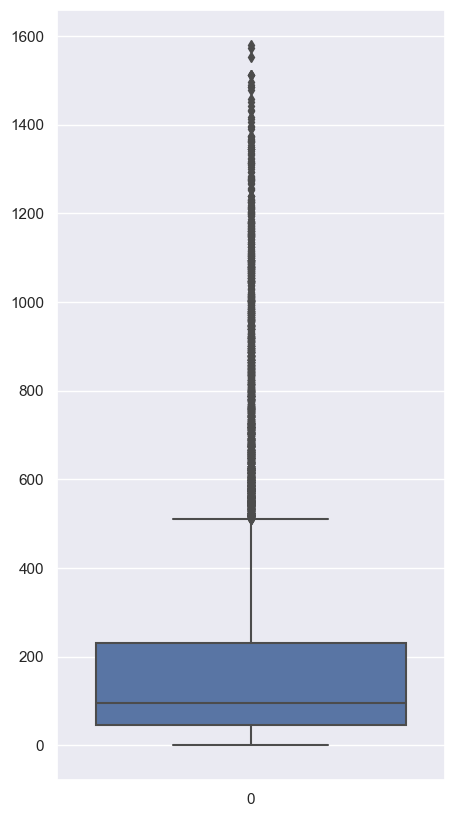

In [104]:
sns.set(rc={"figure.figsize":(5, 10)})
sns.boxplot(data=data['days_exposition']);

На графике видно, что медиана находится на уровне 100, есть много выбросов которые сильно больше медианы. 

In [105]:
data.query('days_exposition > 365') # 3051 квартир продавались больше 1 года ~ 15% от общего количество проданных квартир

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen/ total,living/ total,location_type,last_price_mln,price_per_sqm,weekday_first,month_first,year_first,floor_name,cityCenters_nearest_km
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.299999,4,False,...,0.148214,0.612500,город,5.196,92786.0,3,8,2015,другой,14.0
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,NaN,город,64.900,408176.0,4,7,2015,другой,7.0
13,20,3550000.0,42.799999,2017-07-01,2,2.56,5.0,27.000000,5,False,...,0.121495,0.630841,неизвестно,3.550,82944.0,5,7,2017,последний,33.0
16,11,6700000.0,82.000000,2017-11-23,3,3.05,5.0,55.599998,1,False,...,0.109756,0.678049,город,6.700,81707.0,3,11,2017,первый,11.0
17,6,4180000.0,36.000000,2016-09-09,1,NaN,17.0,16.500000,7,False,...,0.305556,0.458333,город,4.180,116111.0,4,9,2016,другой,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23672,5,3000000.0,30.799999,2016-06-08,1,NaN,5.0,16.100000,3,False,...,0.204545,0.522727,город,3.000,97403.0,2,6,2016,другой,14.0
23675,8,3550000.0,39.500000,2016-10-03,1,NaN,16.0,19.000000,13,False,...,0.215190,0.481013,город,3.550,89873.0,0,10,2016,другой,15.0
23691,11,9470000.0,72.900002,2016-10-13,2,2.75,25.0,40.299999,7,False,...,0.145405,0.552812,город,9.470,129904.0,3,10,2016,другой,4.0
23692,2,1350000.0,30.000000,2017-07-07,1,NaN,5.0,17.500000,4,False,...,0.200000,0.583333,неизвестно,1.350,45000.0,4,7,2017,другой,NaN


Среднее значение - 180 дней, медиана - 95 дней. Скорость продажи некоторых квартир сильно выше медианы, из-за этого среднее значение заметно отличается от медианы. 

In [106]:
def speed_sale(days): # создадим функцию, чтоб разделить период продажи квартиры на категории
    if days < 50:
        return '<50д' 
    elif 50 <= days < 100: 
        return '50д:100д'
    elif 100 <= days <= 365: 
        return '100д:1г'
    elif 365 < days < 700: 
        return '1г:2л'
    else: 
        return '>2л'

In [107]:
data['speed_sale'] = data['days_exposition'].apply(speed_sale) # добавим новый столбец

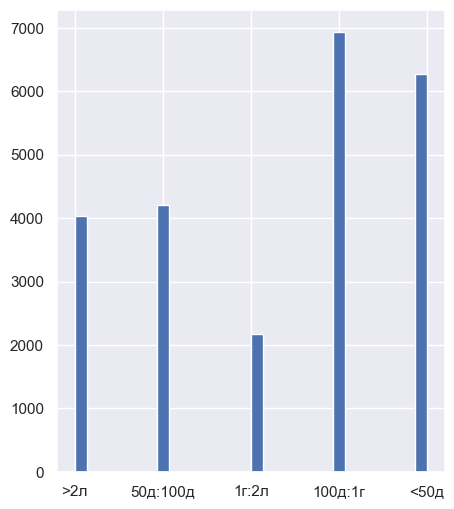

In [108]:
data['speed_sale'].hist(bins=30, figsize=(5,6));

Супер быстрыми продажами можно считать квартиры, которые продали за 50 дней, их 6 тыс. Самые долги продажи - более 2 лет, их чуть больше 4 тыс.

### 3. Изучение факторов, которые влияют на цену

#### 3.1. Зависимость цены от общей площади

Text(0.5, 1.0, 'Зависимость цены от общей площади')

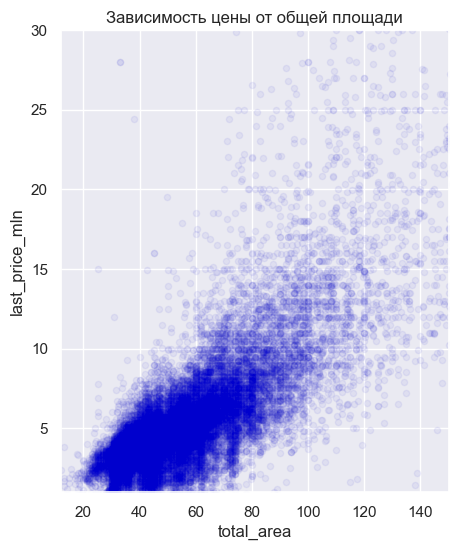

In [109]:
import numpy as np
import matplotlib.pyplot as plt
data.plot(x='total_area', y='last_price_mln', kind='scatter', alpha=0.05, figsize=(5,6), color='mediumblue');
plt.xlim(12,150)
plt.ylim(1,30)
plt.title('Зависимость цены от общей площади')

In [110]:
data['total_area'].corr(data['last_price_mln'])

0.7524007382304536

Видим, что есть линейная зависимость между ценой и общей площадью, чем больше площадь, тем выше цена, об этом также говорит коэффициент корреляции.

#### 3.2. Зависимость цены от жилой площади

Text(0.5, 1.0, 'Зависимость цены от жилой площади')

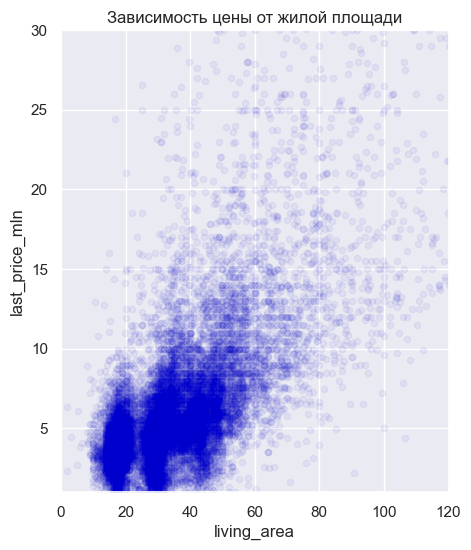

In [111]:
data.plot(x='living_area', y='last_price_mln', kind='scatter', alpha=0.05, figsize=(5,6), color='mediumblue')
plt.xlim(0,120)
plt.ylim(1,30)
plt.title('Зависимость цены от жилой площади')

In [112]:
data['living_area'].corr(data['last_price_mln'])

0.6677606347381646

Линейная зависимость между жилой площадью и ценой также заметна. Коэффициент корреляции чуть ниже. 
Жилая площадь чаще всего занимает большую часть общей площади. 

#### 3.3. Зависимость цены от площади кухни

Text(0.5, 1.0, 'Зависимость цены от площади кухни')

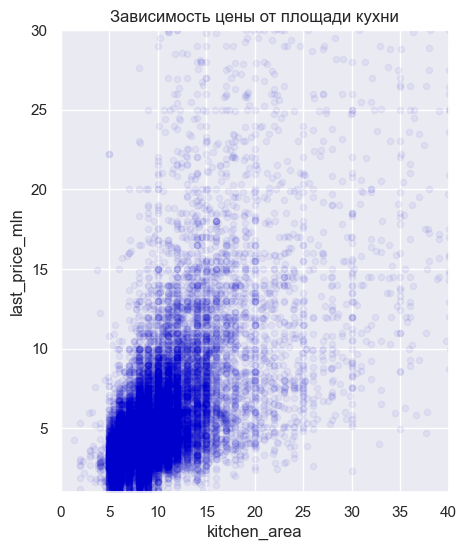

In [113]:
data.plot(x='kitchen_area', y='last_price_mln', kind='scatter', alpha=0.05, figsize=(5,6), color='mediumblue')
plt.xlim(0,40)
plt.ylim(1,30)
plt.title('Зависимость цены от площади кухни')

In [114]:
data['kitchen_area'].corr(data['last_price_mln'])

0.5762669284073672

Здесь зависимость менее очевидна, значения довольно сильно разбросаны, хотя слабый тренд наблюдается, коэффициент корреляции намекает на слабую зависимость.

#### 3.4. Зависимость цены от количества комнат


In [115]:
# построим сводную таблицу, где посчитаем медиану по цене для разного количества комнат
rooms = data.pivot_table(index='rooms', values=['last_price_mln'], aggfunc=('count','median'))
rooms.columns = ['Количество квартир','Медиана']
rooms_data = rooms.reset_index()

Text(0.5, 1.0, 'Зависимость цены от количества комнат')

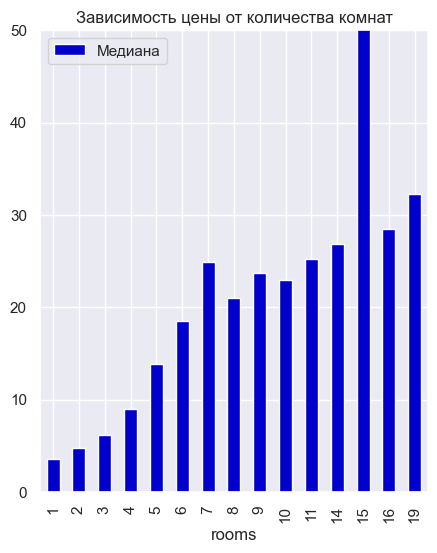

In [116]:
rooms_data[['rooms', 'Медиана']].plot(x='rooms', y='Медиана', kind='bar', figsize=(5,6), color='mediumblue') 
plt.ylim(0,50)
plt.title('Зависимость цены от количества комнат')

Видна прямая зависимость между ценой и количеством комнат.

Text(0.5, 1.0, 'Количество квартир на каждое количество комнат')

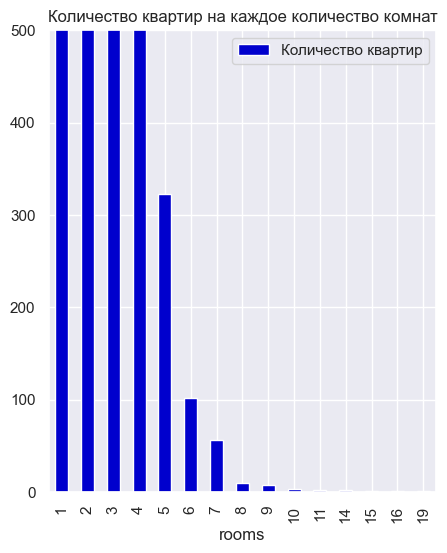

In [117]:
rooms_data[['rooms', 'Количество квартир']].plot(x='rooms', y='Количество квартир', kind='bar', figsize=(5,6), color='mediumblue')
plt.ylim(0,500)
plt.title('Количество квартир на каждое количество комнат')

Надо отметить, что квартиры с количеством комнат больше 6 сильно меньше от общего количества, например, количество квартир с
8 комнатами меньше 20, цены среди этих квартир могут быть сильно разбросаны. В основном представлены квартиры максимум с 3 комнатами.

In [118]:
data['rooms'].corr(data['last_price_mln'])

0.4509807787792246

#### 3.5. Зависимость цены от категории этажа


In [119]:
# построим сводную таблицу, где посчитаем медиану по цене для каждого этажа
floor_name = data.pivot_table(index='floor_name', values=['last_price_mln'], aggfunc=('median'))
floor_name.columns = ['Медиана']
floor_name_data = floor_name.reset_index()

Text(0.5, 1.0, 'Зависимость цены от категории этажа')

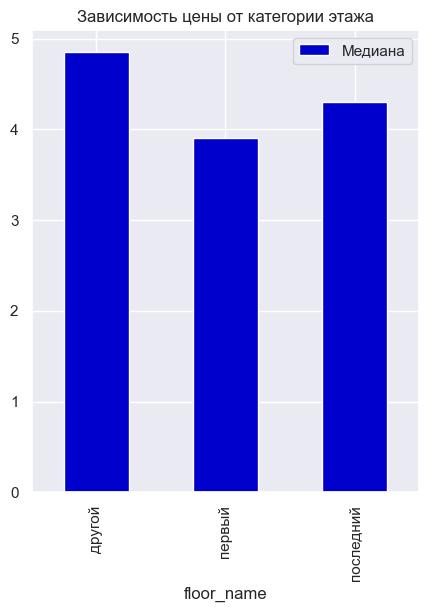

In [120]:
floor_name_data[['floor_name', 'Медиана']].plot(x='floor_name', y='Медиана', kind='bar', figsize=(5,6), color='mediumblue')
plt.title('Зависимость цены от категории этажа')

Судя по графику квартиры на первом этаже стоят дешевле остальных, квартиры не на первом и не на последнем стоят дороже остальных. Сильного различия между категориями не наблюдается, медиана в диапазоне от ~ 4 млн руб до ~ 5 млн руб.

#### 3.6. Зависимость цены от даты размещения (день недели, месяц, год)

In [121]:
year = data.pivot_table(index='year_first', 
                         values='last_price_mln', 
                         aggfunc=('median'))
year.columns = ['Медиана']
year_data = year.reset_index()
year_data

,year_first,Медиана
0,2014,7.640
1,2015,5.324
2,2016,4.515
3,2017,4.500
4,2018,4.550
5,2019,5.050


Text(0.5, 1.0, 'Зависимость цены от года')

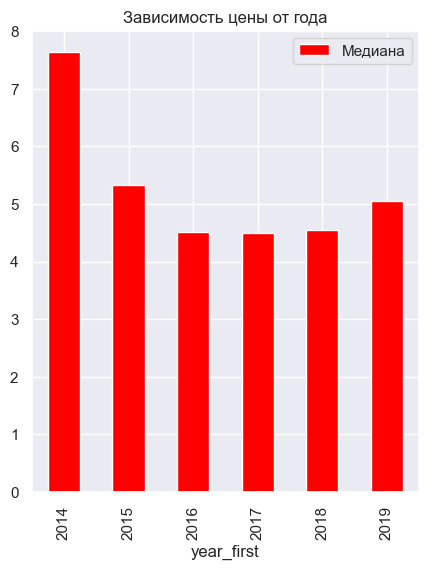

In [122]:
year_data[['year_first', 'Медиана']].plot(x='year_first', kind='bar', color='red', figsize=(5,6))
plt.title('Зависимость цены от года')

Медиана по цене в 2014 году самая высокая, начиная с 2015 года, цены год от года довольно стабильны. 

In [123]:
month = data.pivot_table(index='month_first', 
                         values='last_price_mln', 
                         aggfunc=('median'))
month.columns = ['Медиана']
month_data = month.reset_index()
month_data

,month_first,Медиана
0,1,4.60
1,2,4.65
2,3,4.65
3,4,4.80
4,5,4.50
5,6,4.40
6,7,4.65
7,8,4.57
8,9,4.70
9,10,4.55


Text(0.5, 1.0, 'Зависимость цены от месяца')

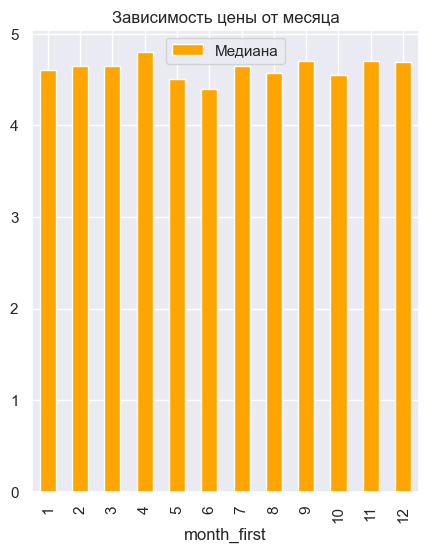

In [124]:
month_data[['month_first', 'Медиана']].plot(x='month_first', kind='bar', color='orange', figsize=(5,6))
plt.title('Зависимость цены от месяца')

Можем сделать вывод, что цена не зависит от месяца публикации объявления, цены стабильны на протяжении абстрактных 12 месяцев. 

In [125]:
weekday = data.pivot_table(index='weekday_first', 
                         values='last_price_mln', 
                         aggfunc=('median'))
weekday.columns = ['Медиана']
weekday_data = weekday.reset_index()
weekday_data

,weekday_first,Медиана
0,0,4.65000
1,1,4.70919
2,2,4.70000
3,3,4.65000
4,4,4.56250
5,5,4.55500
6,6,4.55000


Text(0.5, 1.0, 'Зависимость цены от дня недели')

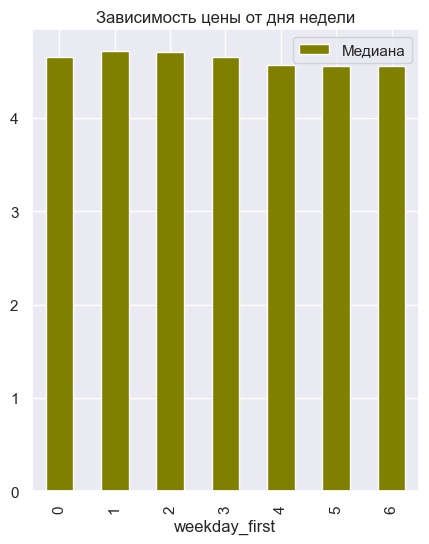

In [126]:
weekday_data[['weekday_first', 'Медиана']].plot(x='weekday_first', kind='bar', color='olive', figsize=(5,6))
plt.title('Зависимость цены от дня недели')

Тут тот же вывод, день недели, когда размещено объявление, не влияет на цену.

### 4. Расчет средней цены 1 кв.м в 10 населённых пунктах с наибольшим числом объявлений

In [127]:
most_flats = data['only_name'].value_counts().head(10)
most_flats

Санкт-Петербург    15703
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: only_name, dtype: int64

In [128]:
# сделаем срез по населенных пунктам, где больше всего объявлений
flats_list = ['Санкт-Петербург', 'Мурино', 'Кудрово', 'Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'Парголово', 'Гатчина',
             'Выборг']
flats = data.query('only_name in @flats_list') 

In [129]:
# посчитаем цену за 1 кв метр
flats_pivot = flats.pivot_table(index='only_name', values='price_per_sqm', aggfunc=('median')).reset_index()
flats_pivot

,only_name,price_per_sqm
0,Всеволожск,65789.0
1,Выборг,58158.0
2,Гатчина,67797.0
3,Колпино,74723.5
4,Кудрово,95675.5
5,Мурино,86175.5
6,Парголово,91643.0
7,Пушкин,100000.0
8,Санкт-Петербург,104750.0
9,Шушары,76876.0


<AxesSubplot:xlabel='only_name'>

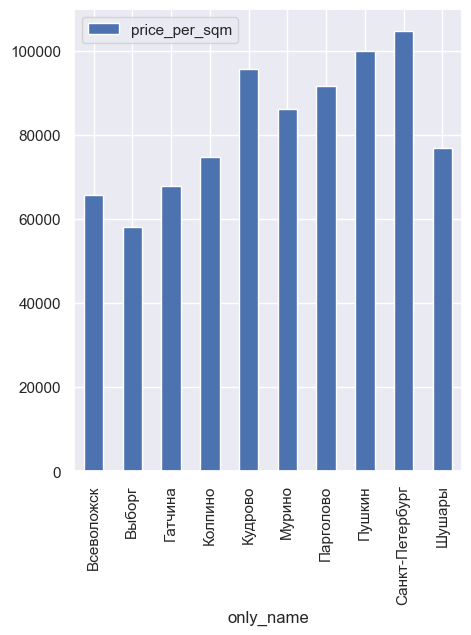

In [130]:
flats_pivot.plot(kind='bar', x='only_name', figsize=(5,6))

Самая высокая стоимость квадратного метра ожидаемо в Санкт-Петербурге, самая дешевые квартиры в Выборге. 

### 5. Влияние расстояние до центра на цену в Санкт-Петербурге

In [131]:
# сделаем срез по Санкт-Петербургу
saint_p = data.query('only_name == "Санкт-Петербург"') 

(0.0, 200.0)

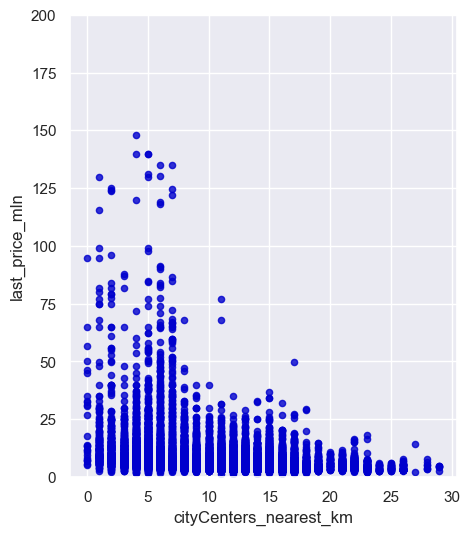

In [132]:
saint_p.plot(x='cityCenters_nearest_km', y='last_price_mln', kind='scatter', alpha=0.8, figsize=(5,6), color='mediumblue')
plt.ylim(0,200)

Если квартиры расположены не более чем в 8 км от центра, цены заметно выше. Квартиры, которые находятся более чем в 18 км от центра, не стоят больше 25 млн рублей. 

In [133]:
# добавим новый столбец с ценой за каждый километр от центра
data['price_Center'] = data['last_price_mln'] / data['cityCenters_nearest_km']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,location_type,last_price_mln,price_per_sqm,weekday_first,month_first,year_first,floor_name,cityCenters_nearest_km,speed_sale,price_Center
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,...,город,13.000,120370.0,3,3,2019,другой,16.0,>2л,0.812500
1,7,3350000.0,40.400002,2018-12-04,1,NaN,11.0,18.600000,1,False,...,поселок,3.350,82921.0,1,12,2018,первый,19.0,50д:100д,0.176316
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.299999,4,False,...,город,5.196,92786.0,3,8,2015,другой,14.0,1г:2л,0.371143
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,False,...,город,64.900,408176.0,4,7,2015,другой,7.0,1г:2л,9.271429
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,...,город,10.000,100000.0,1,6,2018,другой,8.0,100д:1г,1.250000


In [134]:
price_Center = data.loc[data['only_name'] == 'Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km', values='price_Center', aggfunc=('median'))
price_Center = price_Center.reset_index()

<AxesSubplot:xlabel='cityCenters_nearest_km'>

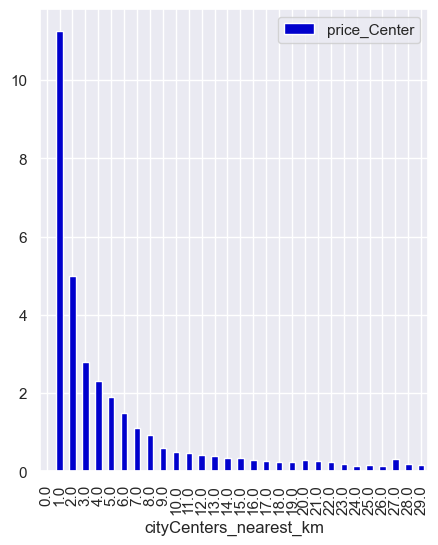

In [135]:
price_Center.plot(kind='bar', x='cityCenters_nearest_km', figsize=(5,6), color='mediumblue')

In [136]:
data.query('cityCenters_nearest_km == 27 and only_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,location_type,last_price_mln,price_per_sqm,weekday_first,month_first,year_first,floor_name,cityCenters_nearest_km,speed_sale,price_Center
748,13,14350000.0,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,город,14.35,193919.0,1,11,2017,другой,27.0,100д:1г,0.531481
5961,6,2250000.0,32.0,2018-02-27,1,NaN,2.0,16.5,2,False,...,город,2.25,70312.0,1,2,2018,последний,27.0,100д:1г,0.083333


Цена за каждый километр от центра снижается, единственное, есть небольшой рост в цене на 27 км, там всего 2 квартиры, поэтому медианная цена может быть завышена.

## Общий вывод

В этои исследовании мы анализировали рынок недвижимости, работали с данными сервиса Яндекс Недвижимость, а именно объявления о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за период с 2014 года по 2019 год включительно. 
В архиве была информация о базовых параметрах квартиры, такие как цена, название населенного пункта, площадь квартиры, её этаж и количество комнат, а также данные о самом доме, в котором находится квартира: количество этажей, расстояние до центра города, аэропорта и ближайшего парка. О самих объявлениях была информация по дате размещения объявления, числе фотографий и периоде, в течение которого было размещено объявление. 
В первую очередь обработали данные:1) изучили пропуски в значениях, некоторые пропуски заменили на логичное значение, часть строк с пропущенными значениями мы удалили, так чтобы это не повлияло на общий ход и результаты исследования, 2) проанализировали наличие дубликатов и аномальных значений.
Далее добавили новые столбцы на основе имеющихся данных, которые пригодились в процессе исследовательского анализа данных. 
В среднем в датасете представлены квартиры с общей площадью от 44 до 50 кв метров, стоимостью в диапазоне от 1 млн до 40 м, медианная цена около 5 млн руб, количество комнат от 1 до 3, расположены не выше 5 этажа. Большинство объявлений опубликованы в будние дни - 20 тыс объявлений, в мае и ноябре размещено наивысшее количество объявлений - около 2500, май самый непопулярный - около 1500. 
Квартиры продавались в среднем за 100 дней, однако 20 процентов продавались больше 2 лет, не более чем за 50 дней были проданы 6 тыс квартир. 
В процессе исследования выявили следующие зависимости: 
1. Присутствует линейная зависимость между общей площадью, жилой площадью, площадью кухни, количеством комнат и ценой, то есть с ростом каждого параметра, растет цена квартиры.
2. Не обнаружили линейную зависимость между категорией этажа, дня недели, года, и месяца, когда объявление было опубликовано и ценой. Возможно присуствует нелинейная зависимость. Если говорить про год размещения объявления, то медианная цена в 2014 году сильно выше цен в последующих годах, после 2014 года медианная цена почти неизменна.
3. Что касается зависимости цены от населенного пункта, предсказуемо в Санкт-Петербурге самые дорогие квартиры: медианная цена за квадратный метр - около 105 тыс рублей (там имеет значение расположение дома, а именно расстояние до центра, чем дальше дом от центра, тем дешевле, в пределах 8 км от центра - самые дорогие квартиры), самые недорогие квартиры в Выборге - около 58 тыс за квадратный метр, в тройку самых недорогих населенных пунктов также входят Всеволожск и Гатчина. 